<a href="https://colab.research.google.com/github/rosacarla/100-days-of-code-challenge-Java/blob/main/Segmentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de dados
## Autora: Carla Edila Silveira
## Dataset: Vendas por Fatura, disponível em: https://drive.google.com/file/d/14T8yNDk_XNsKATT3bP7f2RrMS1ydZWFg/view
## Data: 15/07/2022


In [61]:
import pandas as pd
import numpy as np #funcoes numericas, matematicas, vetores, matrizes
from datetime import datetime as dt
from sklearn.cluster import KMeans #importa biblioteca de pra analise de cluster

In [4]:
tabela = pd.read_csv('/content/sample_data/vendas-por-fatura.csv')
#link dataset: https://drive.google.com/file/d/14T8yNDk_XNsKATT3bP7f2RrMS1ydZWFg/view

In [5]:
tabela.head(10)

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,"199,98"
6,538125,12/9/2020 15:46:00,18225.0,United Kingdom,16,"30,00"
7,544354,2/18/2021 10:42:00,13489.0,United Kingdom,64,"77,28"
8,546369,3/11/2021 11:41:00,15513.0,United Kingdom,10,"67,50"
9,570651,10/11/2021 13:34:00,14911.0,EIRE,86,"321,35"


In [6]:
tabela.info()
#transformar data de tipo texto pra data
#tratar dados ausentes, eliminar 
#transformar nros de tipo texto pra numero

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    25953 non-null  object 
 1   Data da fatura  25953 non-null  object 
 2   ID Cliente      22229 non-null  float64
 3   País            25953 non-null  object 
 4   Quantidade      25953 non-null  int64  
 5   Valor           25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [12]:
tabela.dropna(subset=['ID Cliente']) 
#eliminados os dados faltantes

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83
...,...,...,...,...,...,...
25947,C553519,2021-05-17 14:16:00,18218.0,United Kingdom,-2,-9.90
25948,C556518,2021-06-13 10:53:00,16794.0,United Kingdom,-2,-12.70
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78


In [8]:
tabela['Data da fatura'].values[0]
#mostra 1o. valor da coluna

'3/30/2021 16:14:00'

In [10]:
tabela['Data da fatura'] = tabela['Data da fatura'].apply(lambda x: dt.strptime(x, '%m/%d/%Y %H:%M:%S'))

In [11]:
tabela['Valor'] = tabela['Valor'].apply(lambda x: float(x.replace(',','.')))

In [50]:
tabela['Ticket Medio'] = tabela['Valor'] / tabela['Quantidade']

In [51]:
tabela.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Ticket Medio
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,1.864472
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,1.286687
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,39.950000
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,0.965910
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2.197582


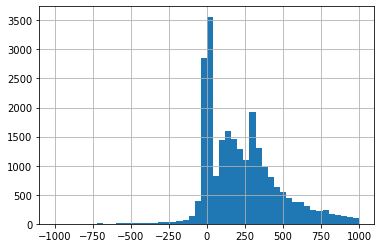

In [14]:
tabela['Valor'].hist(bins=50, range=(-1000,1000))
#plota grafico de histograma com 50 barras e range de -1000 a 1000

In [15]:
tabela[tabela['Valor']<0]

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45
10,C543628,2021-02-10 15:51:00,16558.0,United Kingdom,-5,-9.25
17,C553508,2021-05-17 13:44:00,14000.0,United Kingdom,-3,-1.95
20,C577693,2021-11-21 11:48:00,12628.0,Germany,-3,-16.85
22,C547309,2021-03-22 11:17:00,17416.0,United Kingdom,-12,-45.00
...,...,...,...,...,...,...
25939,C572450,2021-10-24 12:35:00,NaN,United Kingdom,-2,-278.15
25943,C557061,2021-06-16 14:55:00,14895.0,United Kingdom,-5,-14.75
25944,C562147,2021-08-03 10:47:00,16180.0,United Kingdom,-7,-18.35
25947,C553519,2021-05-17 14:16:00,18218.0,United Kingdom,-2,-9.90


In [17]:
tabela['Valor'].max()
#mostra valor maximo

168469.6

In [18]:
tabela[tabela['Valor']==tabela['Valor'].max()]
#mostra valor maximo da coluna Valor

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
13136,581483,2021-12-09 09:15:00,16446.0,United Kingdom,80995,168469.6


In [19]:
tabela['Quantidade'].max()
#mostra maior valor da tabela

80995

In [21]:
tabela = tabela[tabela['Valor']>0]

In [22]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20005 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    20005 non-null  object        
 1   Data da fatura  20005 non-null  datetime64[ns]
 2   ID Cliente      18565 non-null  float64       
 3   País            20005 non-null  object        
 4   Quantidade      20005 non-null  int64         
 5   Valor           20005 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [27]:
np.unique(tabela['ID Cliente'])
#mostra array de valores unicos

array([12346., 12347., 12348., ..., 18283., 18287.,    nan])

In [28]:
len(np.unique(tabela['ID Cliente']))
#conta valore unicos

4339

In [29]:
tabela['Data da fatura'].min()

Timestamp('2020-12-01 08:26:00')

In [30]:
tabela['Data da fatura'].max()

Timestamp('2021-12-09 12:50:00')

In [36]:
t1 = tabela.pivot_table(index='ID Cliente',values='N° da fatura',aggfunc='count').reset_index()
#t1 é tabela temporaria com calculo da frequencia relativa de cada cliente na base de dados
#resetados os indices da tabela

In [37]:
t1.head()
#mostra tabela tratada

,ID Cliente,N° da fatura
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [42]:
tabela.columns

Index(['N° da fatura', 'Data da fatura', 'ID Cliente', 'País', 'Quantidade',
       'Valor'],
      dtype='object')

In [46]:
t1.columns = ['ID Cliente', 'Frq']

In [47]:
t1.join(tabela[['ID Cliente', 'País']], lsuffix=['ID Cliente'], rsuffix=['ID Cliente'])

,ID Cliente['ID Cliente'],Frq,ID Cliente['ID Cliente'],País
0,12346.0,1,15528.0,United Kingdom
1,12347.0,7,17348.0,United Kingdom
2,12348.0,4,NaN,NaN
3,12349.0,1,17045.0,United Kingdom
4,12350.0,1,16416.0,United Kingdom
...,...,...,...,...
4333,18280.0,1,14060.0,United Kingdom
4334,18281.0,1,NaN,NaN
4335,18282.0,2,14528.0,United Kingdom
4336,18283.0,16,14911.0,EIRE


In [52]:
t2 = pd.merge(t1,tabela,how='left',on='ID Cliente')

In [58]:
t3 = t2.pivot_table(index='ID Cliente',values=['Quantidade','Valor','Ticket Medio','Frq'], aggfunc='mean')
#mostra frequencia do cliente, qunantidade, valor, ticket medio e media de valor

In [59]:
t3

,Frq,Quantidade,Ticket Medio,Valor
ID Cliente,,,,
12346.0,1,74215.000000,1.040000,77183.600000
12347.0,7,351.142857,1.743802,615.714286
12348.0,4,585.250000,0.970820,449.310000
12349.0,1,631.000000,2.785341,1757.550000
12350.0,1,197.000000,1.697462,334.400000
...,...,...,...,...
18280.0,1,45.000000,4.013333,180.600000
18281.0,1,54.000000,1.496667,80.820000
18282.0,2,51.500000,2.058067,89.025000


In [68]:
modelo = KMeans(5).fit(t3)
#modelo de clusterização em 5 grupos/classes

In [69]:
modelo.labels_.shape
#mostra quantidade de rotulos das classes

(4338,)

In [70]:
t4 = t2.pivot_table(index='ID Cliente',values=['Quantidade','Valor','Ticket Medio','Frq'], aggfunc='mean').reset_index()

In [71]:
t4['Cluster'] = modelo.labels_

In [72]:
t4
#mostra tabela t4

,ID Cliente,Frq,Quantidade,Ticket Medio,Valor,Cluster
0,12346.0,1,74215.000000,1.040000,77183.600000,1
1,12347.0,7,351.142857,1.743802,615.714286,0
2,12348.0,4,585.250000,0.970820,449.310000,0
3,12349.0,1,631.000000,2.785341,1757.550000,4
4,12350.0,1,197.000000,1.697462,334.400000,0
...,...,...,...,...,...,...
4333,18280.0,1,45.000000,4.013333,180.600000,0
4334,18281.0,1,54.000000,1.496667,80.820000,0
4335,18282.0,2,51.500000,2.058067,89.025000,0
4336,18283.0,16,87.312500,1.584208,130.930000,0


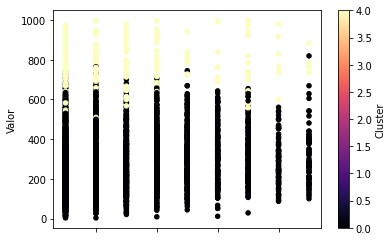

In [74]:
t4[(t4['Valor']<1000)&(t4['Frq']<10)].plot.scatter(x='Frq',y='Valor',c= 'Cluster', cmap='magma')
#plota grafico 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


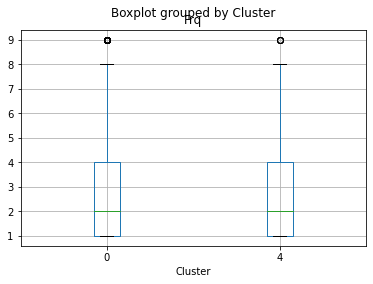

In [77]:
t4[(t4['Valor']<1000)&(t4['Frq']<10)].boxplot(column='Frq',by='Cluster')
#plota boxplot da frequencia de Valor

0